# 2020 annual CDC survey data of 400k adults related to their health status

## What topic does the dataset cover?

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


## Importing the Libraries

In [2]:
# Libraries for Data Preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Libraries for measuring accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
%matplotlib inline

## Importing the Dataset

In [3]:
# read_csv function is used to read a csv file. It takes the filepath as argument
df = pd.read_csv('../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
# this prints the first 5 rows of the dataset by default
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Changing Grid Style to Dark

In [4]:
# this changes the style of the plots in seaborn. Changing the grid to dark
sns.set_style("darkgrid", {"grid.color": ".6"})

## Counting Variation of all Categorical Variables

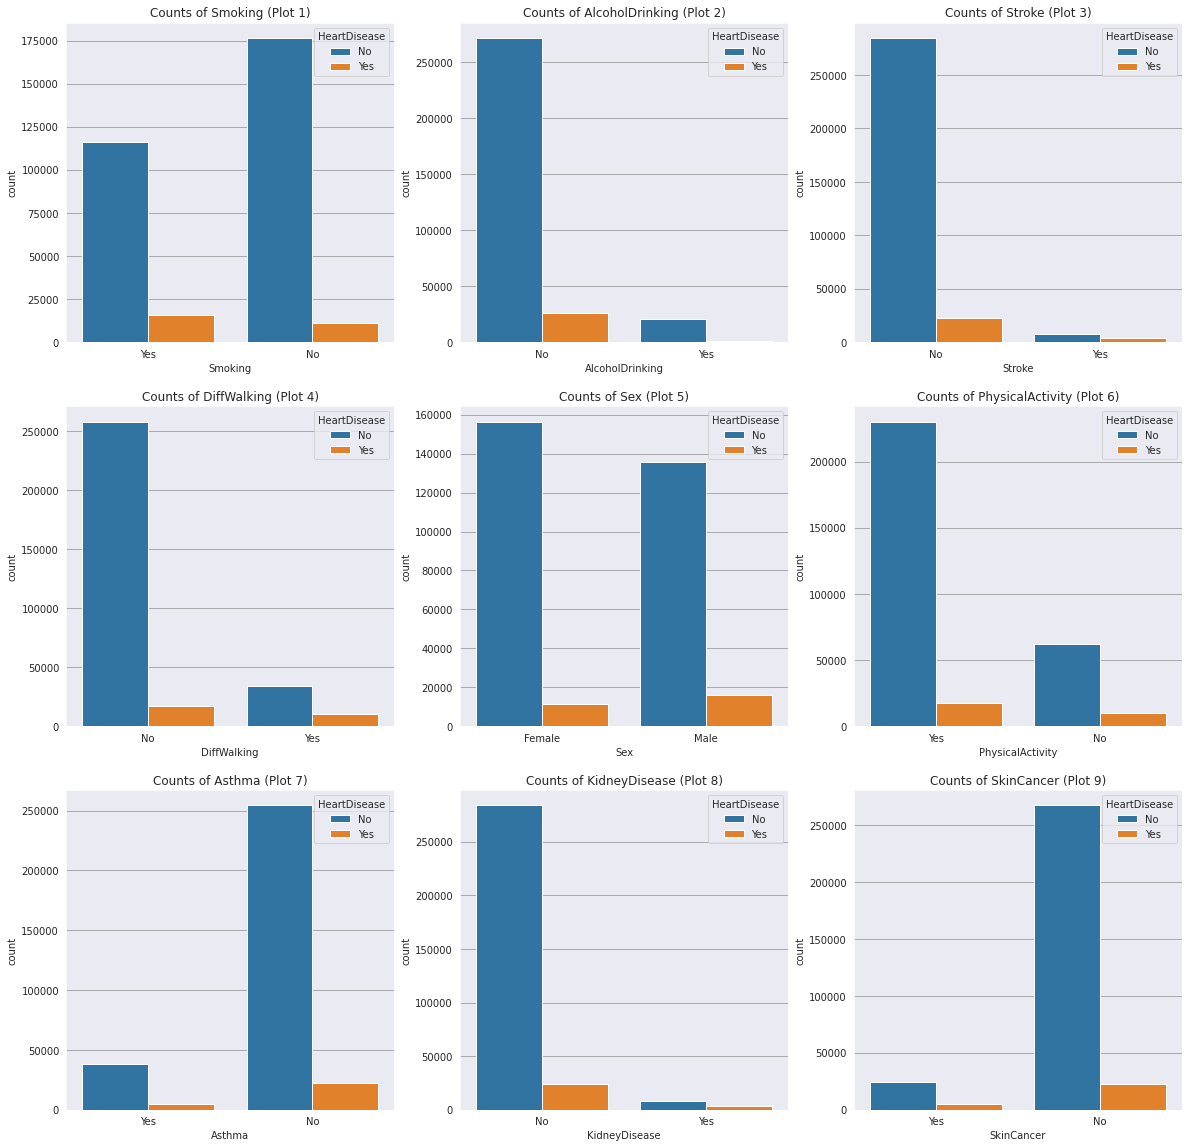

In [5]:
# This list of lists contains all the columns which have binary categorical values
colRange = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]
# This function prints the countplots counting the number of people in each category
def printCount(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    row=0
    col=0
    p_count=1
    for row in range(3):
        for col in range(3):
            # reads column name from the list
            column = colRange[row][col]
            # plots the counts of the particular column
            sns.countplot(ax=axes[row,col],x=df[column],hue=df['HeartDisease'])
            # sets the title of the corresponding plot along with plot number
            axes[row,col].set_title("Counts of {} (Plot {})".format(column,p_count))
            p_count += 1
# Calling the function
printCount(colRange)

#### Observation
Plot 1 - According to the plot people who smoke have a higher chance of Heart Diseases than people who don't
Plot 2 - According to the plot people who do not drink alcohol have a lower of Heart Disease 
Plot 3 - According to the plot people having Heart Disease have a lower chance of having a Stroke
Plot 4 - According to the plot people who do not have any difficulty in walking have a lower chance of Heart Disease 
Plot 5 - According to the plot Males have a higher chance of Heart Disease than Females
Plot 6 - According to the plot People who participate in Physical Activity cause Heart Diseases

## Checking Heart Disease among Different Races

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Heart Disease amoung Races')

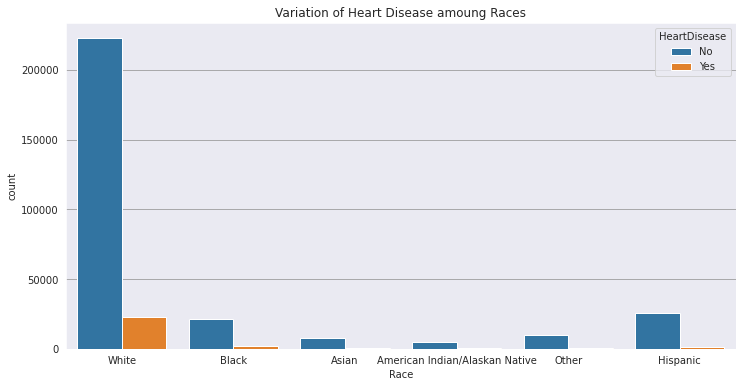

In [6]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.countplot(df['Race'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease amoung Races')

## Checking Spread of Heart Disease among Diabetic People

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Heart Disease among Diabetic People')

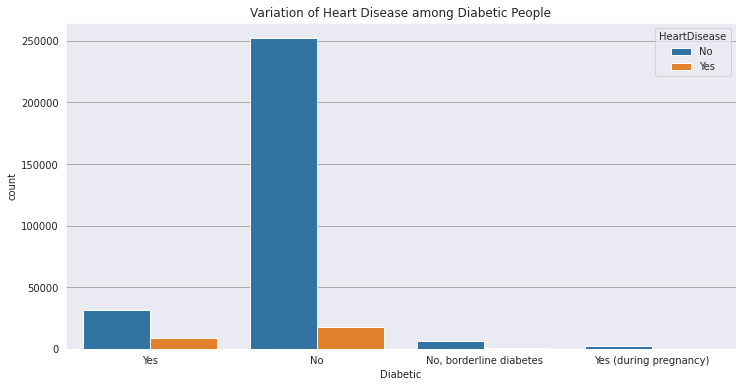

In [7]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting the graph
sns.countplot(df['Diabetic'],hue=df['HeartDisease'])
plt.title('Variation of Heart Disease among Diabetic People')

## Plotting Variation of BMI with Heart Disease 

Text(0.5, 1.0, 'Distribution of BMI Among People')

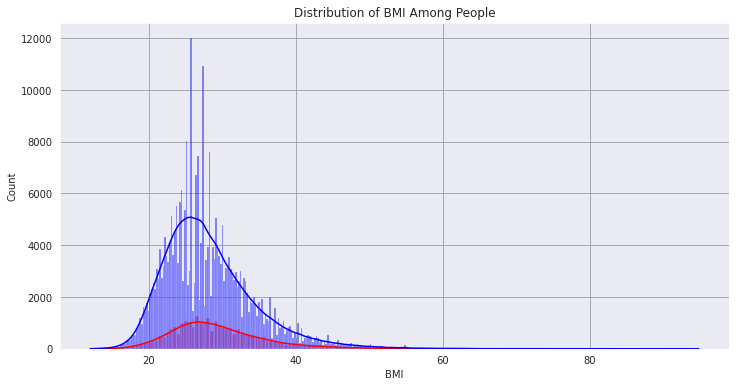

In [8]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# histplot plots the distribution of values in the particular column
# kde plots 'kernel distribution estimate' of that particular column
# plotting both graph on top of each other
sns.histplot(data=df[df['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=df[df['HeartDisease']=='No'],x='BMI',kde=True,color='blue')
plt.title('Distribution of BMI Among People')

## Checking variation of Physical Health among people with and without Heart Disease

Text(0.5, 1.0, 'Physical Health Pattern')

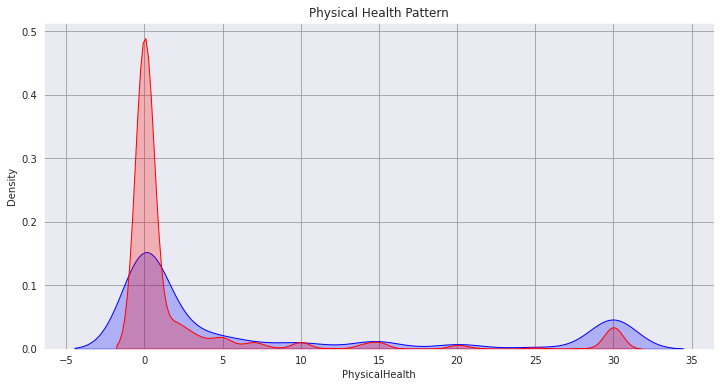

In [9]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# kdeplots show an estimated, smooth distribution of a single numerical variable
# plotting both graphs on top of each other
sns.kdeplot(df[df['HeartDisease']=='Yes']['PhysicalHealth'],shade=True,color='blue')
sns.kdeplot(df[df['HeartDisease']=='No']['PhysicalHealth'],shade=True,color='red')
plt.title('Physical Health Pattern')

## Checking Variation of Mental health among people with and without Heart Diseases

Text(0.5, 1.0, 'Variation of Mental Health')

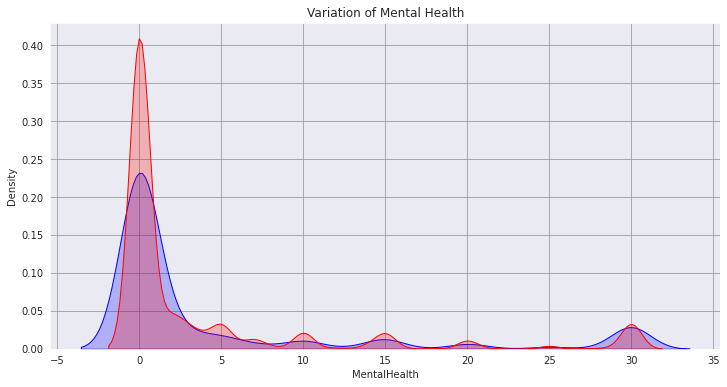

In [10]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(df[df['HeartDisease']=='Yes']['MentalHealth'],shade=True,color='blue')
sns.kdeplot(df[df['HeartDisease']=='No']['MentalHealth'],shade=True,color='red')
plt.title('Variation of Mental Health')

## Drawing the correlation graph

<AxesSubplot:>

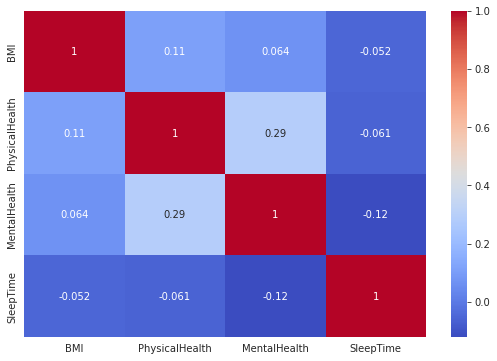

In [11]:
# importing matplotlib library
import matplotlib
# This statement reduces the size of image
plt.figure(figsize=(9,6))
# plotting the graph
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Checking Columns of the Dataset

In [12]:
# the info() function gives information about all the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

## Checking unique Values in Categorical Columns

In [13]:
# the unique() function prints the unique values in a particular column. It is used to check the values in a categorical column.
# printing all the unique values of each column 
print(df['Smoking'].unique())
print(df['AlcoholDrinking'].unique())
print(df['Stroke'].unique())
print(df['DiffWalking'].unique())
print(df['Sex'].unique())
print(df['AgeCategory'].unique())
print(df['Race'].unique())
print(df['Diabetic'].unique())
print(df['PhysicalActivity'].unique())
print(df['GenHealth'].unique())
print(df['Asthma'].unique())
print(df['KidneyDisease'].unique())
print(df['SkinCancer'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


## Encoding all Binary Categorical Columns

In [14]:
# this is a user defined function that encodes the categorical columns
def change(col):
    if col=='Yes':
        return 1
    elif col=='No':
        return 0
# the apply() function puts value of each row one by one in a column to encode that whole column
# encoding all categorical columns having binary values
df['Smoking'] = df['Smoking'].apply(change)
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(change)
df['Stroke'] = df['Stroke'].apply(change)
df['DiffWalking'] = df['DiffWalking'].apply(change)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(change)
df['Asthma'] = df['Asthma'].apply(change)
df['KidneyDisease'] = df['KidneyDisease'].apply(change)
df['SkinCancer'] = df['SkinCancer'].apply(change)
df['HeartDisease'] = df['HeartDisease'].apply(change)

## Checking State of dataset

In [15]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


## Label Encoding all categorical columns with more than 2 values

In [16]:
# making an instance of the label encoder class
le = LabelEncoder()
# label encoding all the categorical columns that have more than 2 unique values
df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

## Checking state of Dataset

In [17]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


## Dividing Dataset into Training and Test Set

In [18]:
# iloc[] function is used to select values from the dataset
# independent variables
X = df.iloc[:,1:].values
# dependent variable
y = df.iloc[:,0].values

## Splitting dataset into Training and Test Set

In [19]:
# train_test_split() is used to divide dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Feature Scaling

In [20]:
# declaring an object of standardscaler class
sc = StandardScaler()
# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)
# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

## Training Models

### 1. Logistic Regression

In [21]:
# declaring a object of Logistic regression class
clf1 = LogisticRegression()
# fit() function trains the model
# fitting the object with the training data
clf1.fit(X_train, y_train)
# predict() function predicts results from validation data
# predicting result using the trained data
y_pred1 = clf1.predict(X_test)
# confusion_matrix() gives the true_positives, false positives, true negatives, false negatives
# making confusion matrix using predicted and given results in validation data
cm1=confusion_matrix(y_test,y_pred1)
# printing the confusion matrix
print(cm1)
# accuracy_score() is used to find the accuracy of the model
print(accuracy_score(y_test,y_pred1))

[[58037   422]
 [ 4987   513]]
0.9154301974702543


### 2. K Nearest Neighbors

In [22]:
# declaring a object of K Neighbors Classifier class
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)
print(accuracy_score(y_test,y_pred2))

[[57196  1263]
 [ 4774   726]]
0.9056114073078065


### 3. Naive Bayes

In [23]:
# declaring a object of GaussianNB class
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred3)
print(cm3)
print(accuracy_score(y_test,y_pred3))

[[51586  6873]
 [ 2961  2539]]
0.8462452508638346


### 4. Support Vector Machine ( Not Recommended due to very long execution time {more than 4 hours} ) 

In [24]:
# clf4 = SVC()
# clf4.fit(X_train,y_train)
# y_pred4 = clf4.predict(X_test)
# cm4 = confusion_matrix(y_test,y_pred4)
# print(cm4)
# print(accuracy_score(y_test,y_pred4))

In [25]:
# rand_grid = {
#     'kernel':['linear','poly','rbf','sigmoid'],
#     'C':[int(x) for x in np.linspace(start = 2, stop = 10,num = 10)],
#     'gamma':[int(x) for x in np.linspace(start = 0.1, stop = 1, num = 5)]
# }

In [26]:
# rcv = RandomizedSearchCV(estimator=clf4,param_distributions=rand_grid,n_iter=100,cv=3,verbose=2,random_state=0,n_jobs=-1)
# rcv.fit(X_train, y_train)

In [27]:
# print(rcv.best_params_)
# print(rcv.best_estimator_)

### 5. Decision Tree

In [28]:
# declaring a object of Decision Tree Classifier class
clf5 = DecisionTreeClassifier(criterion='entropy')
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
cm5 = confusion_matrix(y_test,y_pred5)
print(cm5)
print(accuracy_score(y_test,y_pred5))

[[54103  4356]
 [ 4121  1379]]
0.8674619678231367


### 6. Random Forest

In [29]:
# declaring a object of Random Forest Classifier class
clf6 = RandomForestClassifier(criterion='entropy',n_estimators=50)
clf6.fit(X_train, y_train)
y_pred6 = clf6.predict(X_test)
cm6 = confusion_matrix(y_test,y_pred6)
print(cm6)
print(accuracy_score(y_test,y_pred6))

[[57313  1146]
 [ 4887   613]]
0.9056739473725355


### Applying Hyperparameter Tuning on Random Forest

### RandomizedSearchCV

###     a) Making the Parameter Grid

In [30]:
# making the set of parameters to test the RandomizedSearchCV 
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini']
}
print(param_grid)

{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


### b) Running RandomizedSearchCV to find best parameters

In [31]:
# RandomizedSearchCV randomly assigns a best class and checks if it is best by training the model on those parameters
# making an object of the RandomizedSearchCV class
rcv = RandomizedSearchCV(estimator=clf6,param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
# training the RandomizedSearchCV to find the best parameters
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=780, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=23; total time=  10.6s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=67; total time=  29.0s
[CV] END criterion=gini, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=67; total time=  29.1s
[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=  43.0s
[CV] END criterion=entropy, max_depth=560, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=100; total time=  44.0s
[CV] END criterion=entropy, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=45; total time=  18.1s
[CV] END criterion=gini, max_depth=340, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_e

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=50),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              14],
                                        'n_estimators': [2, 12, 23, 34, 45, 56,
                                                         67, 

### c) Checking Best Parameters

In [32]:
# this best_params_ attribute prints the best attributes that were found by RandomizedSearchCV
rcv.best_params_

{'n_estimators': 67,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 890,
 'criterion': 'gini'}

### d) Checking Best Estimator

In [33]:
# this best_estimator_ prints the best model that was found by RandomizedSearchCV
rcv.best_estimator_

RandomForestClassifier(max_depth=890, min_samples_leaf=8, min_samples_split=10,
                       n_estimators=67)

### e) Training Random Forest with Best Parameters Found

In [34]:
# making another object of the Random Forest Classifier to test it with the best parameters
clf8 = RandomForestClassifier(criterion='gini',n_estimators=89,max_depth=890,max_features='log2',min_samples_split=2,min_samples_leaf=8)
clf8.fit(X_train, y_train)
y_pred8 = clf8.predict(X_test)
cm8 = confusion_matrix(y_test,y_pred8)
print(cm8)
print(accuracy_score(y_test,y_pred8))

[[58273   186]
 [ 5210   290]]
0.9156334526806236


### 7) XGBoost

In [35]:
# making an object of the XGBoost class 
clf7 = XGBClassifier()
clf7.fit(X_train, y_train)
y_pred7 = clf7.predict(X_test)
cm7 = confusion_matrix(y_test,y_pred7)
print(cm7)
print(accuracy_score(y_test,y_pred7))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[58012   447]
 [ 4944   556]]
0.9157116277615347
